> ## **Machine Learning Aplicado II**
> ### **Professor:** Juan Gabriel Collona
> ### **Alunos:** Eduardo Sardinha e Volnei Klehm

# Objetivo

Descobrir os fatores que mais influenciam na expectativa de vida no mundo de forma geral, no Brasil de forma específica, e construiur um modelo que preveja a expectativa de vida de um indivíduo.

Usaremos os dados do dataset **Life Expectancy (WHO)** (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/). Trata-se de um dataset público disponibilizado pela OMS (Organização Mundial de Saúde) que descreve fatores que influenciam a expectativa de vida em 193 países. O dataset contém dados coletados ao longo de 16 anos (2000-2015) e consiste de 22 colunas, 2938 linhas e 21 variáveis.

Nosso objetivo é analisar as variáveis mais relevantes e construir um modelo a partir desse subconjunto, avaliando o impacto delas no modelo de predição (regressão).

# Dados

In [2]:
# imports e configurações iniciais
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme()

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [3]:
# faz download do dataset do github
import requests

dataset = 'Life_Expectancy_Data.csv'
response = requests.get('https://github.com/e-sardinha/pos_uea/raw/refs/heads/main/ml2/projeto/dataset/Life%20Expectancy%20Data.csv')

with open(dataset, 'wb') as f:
    f.write(response.content)

# Pré-Processamento

## Exploração dos dados

In [4]:
df = pd.read_csv(dataset)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Descrição das variáveis:**

https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-birth-(years)

https://www.who.int/data/gho/indicator-metadata-registry

```
Status: nível de desenvolvimento do país
percentage expenditure, Total expenditure: medidas relativa a gastos com saúde
Hepatitis B, Polio, Diphteria: dados relativos a imunização (vacina)
Measles: incidência de Sarampo
BMI: nível de massa corporal
GDP: Gross Domestic Product
```


In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

É possível ver que temos apenas duas colunas categóricas ('Country' e 'Status'). Todas as demais colunas (inclusive a coluna alvo 'Life expectation') são **numéricas** e há valores faltantes em várias delas.

In [7]:
# normaliza espaços nos nomes das colunas (garante apenas um espaço entre palavras) e remove espaços em branco no início/fim
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

df.columns = ['Country', 'Year', 'Status', 'Life expectancy', 
              'Adult mortality', 'Infant deaths', 'Alcohol', 
              'Percentage expenditure', 'Hepatitis B', 'Measles', 
              'BMI', 'Under-five deaths', 'Polio', 'Total expenditure', 
              'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
              'Thinness 1-19 years', 'Thinness 5-9 years', 
              'Income', 'Schooling']

print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years', 'Thinness 5-9 years', 'Income', 'Schooling']


In [8]:
# statistical summary
df.describe().drop(columns=['Year'])

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Parece haver uma grande correlação entre os pares de variáveis ('Thinness 1-19 years', 'Thinness 5-9 years') e ('Infant deaths', 'Under-five deaths').

In [9]:
df[['Thinness 1-19 years', 'Thinness 5-9 years', 'Infant deaths', 'Under-five deaths']].describe()

,Thinness 1-19 years,Thinness 5-9 years,Infant deaths,Under-five deaths
count,2904.000000,2904.000000,2938.000000,2938.000000
mean,4.839704,4.870317,30.303948,42.035739
std,4.420195,4.508882,117.926501,160.445548
min,0.100000,0.100000,0.000000,0.000000
25%,1.600000,1.500000,0.000000,0.000000
50%,3.300000,3.300000,3.000000,4.000000
75%,7.200000,7.200000,22.000000,28.000000
max,27.700000,28.600000,1800.000000,2500.000000


Olhando as estatísticas descritivas dessas variáveis, parece que as colunas 'Thinness' carregam praticamente a mesma informação (inclusive quantitativa).

In [10]:
# comparação entre as variaveis 'Thinness 1-19 years' e 'Thinness 5-9 years'
fig = px.scatter(df, x="Thinness 1-19 years", y="Thinness 5-9 years", trendline="ols", \
                 title="Comparação entre 'Thinness 1-19 years' e 'Thinness 5-9 years'", color='Status')
fig.show()

In [11]:
# sns.scatterplot(data=df, x="Thinness 1-19 years", y="Thinness 5-9 years")
# plt.title("Comparação entre 'Thinness 1-19 years' e 'Thinness 5-9 years'")
# plt.show()

In [12]:
# coeficiente de correlação entre as variáveis Thinness '1-19 years' e '5-9 years'
print(df[["Thinness 1-19 years", "Thinness 5-9 years"]].corr())

                     Thinness 1-19 years  Thinness 5-9 years
Thinness 1-19 years             1.000000            0.939102
Thinness 5-9 years              0.939102            1.000000


Como pode-se verificar do gráfico de pontos acima e do coeficiente de correlação, trata-se praticamente da mesma variável, com a mesma curva de densidade de probabilidade (abaixo).

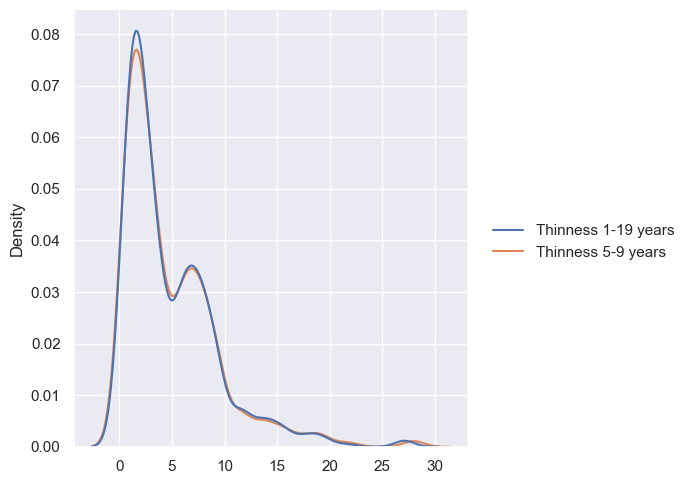

In [13]:
# plota curva de distribuição
sns.displot(df[["Thinness 1-19 years", "Thinness 5-9 years"]], kind="kde", fill=False)

Assim, vamos escolher como variável 'Thinness' a coluna 'Thinness 1-19 years'.

In [14]:
df.drop(columns=['Thinness 5-9 years'], inplace=True)
df.rename(columns={'Thinness 1-19 years': 'Thinness'}, inplace=True)

Ocorre algo semelhante com as variáveis 'Infant deaths' e 'Under-five deaths', como podemos ver do gráfico de pontos e coeficiente de correlação abaixo.

In [15]:
# comparação entre as variaveis 'Infant deaths' e 'Under-five deaths'
fig = px.scatter(df, x="Infant deaths", y="Under-five deaths", trendline="ols", \
                 title="Comparação entre 'Infant deaths' e 'Under-five deaths'", color='Status')
fig.show()

In [16]:
# coeficiente de correlação entre as variáveis 'Infant deaths' e 'Under-five deaths'
print(df[["Infant deaths", "Under-five deaths"]].corr())

                   Infant deaths  Under-five deaths
Infant deaths           1.000000           0.996629
Under-five deaths       0.996629           1.000000


Como ambas as variáveis carregam a informação de mortalidade infantil, escolheremos a coluna 'Infant deaths' para representar essa informação.

In [17]:
df.drop(columns=['Under-five deaths'], inplace=True)

Vamos transforma a coluna categórica 'Status' (de desenvolvimento do país) em uma variável numérica:

In [18]:
# transforma variavel categórica 'Status' em numérica
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

In [19]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness', 'Income', 'Schooling'],
      dtype='object')

## Visualização dos dados

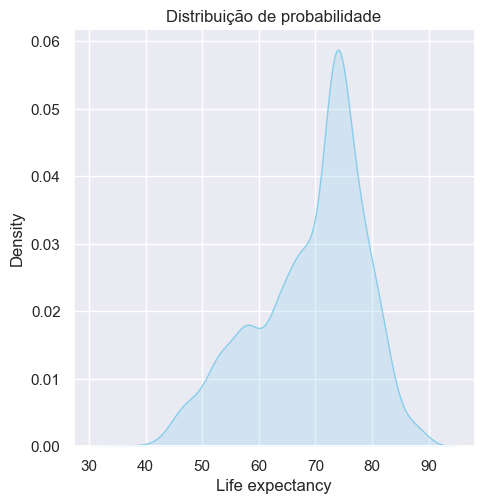

In [20]:
# grafico de distribuição de probabilidade da variavel target 'Life expectancy'
fig = sns.displot(df["Life expectancy"], kind="kde", fill=True, color="skyblue", bw_adjust=1)
plt.title("Distribuição de probabilidade")
plt.xlabel("Life expectancy")
plt.show()

In [21]:
# lista das features numéricas (e não categóricas)
features = df.columns.difference(['Country']).tolist()

# calcula a matriz de correlação
corr = df[features].corr().round(2)

# ordena por correlação com 'Life expectancy' (ordem decrescente)
features = corr['Life expectancy'].sort_values(ascending=False).index.tolist()

# reordena a matriz usando os índices ordenados
corr = corr.loc[features, features]

# matriz de correlação completa
fig = px.imshow(corr, 
          text_auto=True, color_continuous_scale='RdBu_r', title="Matriz de correlação de variáveis numéricas")
fig.update_layout(width=900, height=800)
fig.show()

In [22]:
# seleciona a correlação com a variável target 'Life expectancy'
print(corr['Life expectancy'])

Life expectancy           1.00
Schooling                 0.75
Income                    0.72
BMI                       0.57
Diphtheria                0.48
Status                    0.48
Polio                     0.47
GDP                       0.46
Alcohol                   0.40
Percentage expenditure    0.38
Hepatitis B               0.26
Total expenditure         0.22
Year                      0.17
Population               -0.02
Measles                  -0.16
Infant deaths            -0.20
Thinness                 -0.48
HIV/AIDS                 -0.56
Adult mortality          -0.70
Name: Life expectancy, dtype: float64


In [23]:
# seleciona apenas os coeficientes cujo valor absoluto seja maior ou igual a CORR_MIN
CORR_MIN = 0.45
correlation_target = corr["Life expectancy"]
correlation_target = correlation_target[(correlation_target.abs() >= CORR_MIN) & (correlation_target.index != 'Life expectancy')]
print(correlation_target)

Schooling          0.75
Income             0.72
BMI                0.57
Diphtheria         0.48
Status             0.48
Polio              0.47
GDP                0.46
Thinness          -0.48
HIV/AIDS          -0.56
Adult mortality   -0.70
Name: Life expectancy, dtype: float64


In [24]:
# plota scatter matrix com as features que mais se correlacionam com a variável target 'Life expectancy'
features = correlation_target.index.tolist()
dimensions = features.copy()
dimensions.remove('Status')  # remove 'Status' para evitar problemas de visualização

fig = px.scatter_matrix(df, dimensions=dimensions, color='Life expectancy', 
                        title=f"abs(Correlation) >= {CORR_MIN} com 'Life expectancy'")
fig.update_layout(height=1000)
fig.show()

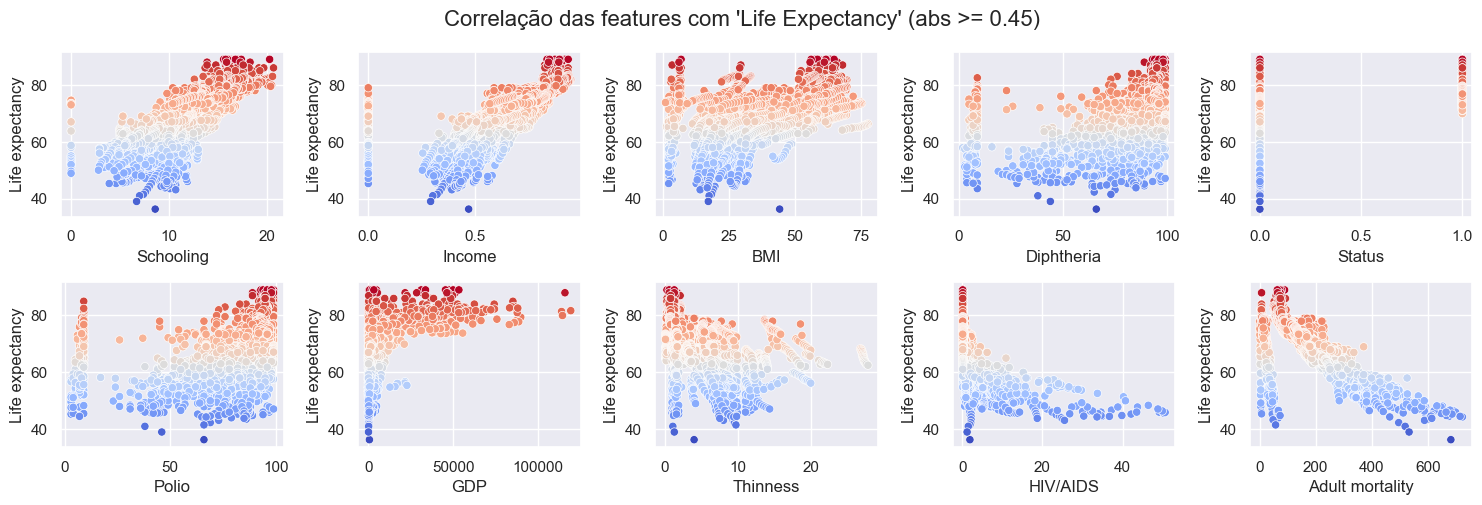

In [25]:
def scatter_plot(df, columns):
    plt.figure(figsize=(15,7))
    plt.suptitle(f"Correlação das features com 'Life Expectancy' (abs >= {CORR_MIN})", fontsize=16, y=0.98)
    for indx, var in enumerate(columns):
        plt.subplot(3,5,indx+1)
        sns.scatterplot(x=var, y='Life expectancy', hue=df['Life expectancy'], data=df, palette='coolwarm', legend=False)
    plt.tight_layout()
    
scatter_plot(df, features)

## Tratamento de dados incorretos e faltantes

In [26]:
# verifica se existe alguma coluna numérica com valores negativos
df[df.select_dtypes(include=[np.number]).lt(0).any(axis=1)].shape[0]

0

Não existem valores numéricos negativos. E já sabemos que temos valores faltantes em algunas colunas. Vamos aplicar a estratégia de preencher os faltantes com a **mediana** através de um **SimpleImputer**.

In [27]:
# identifica colunas com valores faltantes
print(df.isnull().sum())

Country                     0
Year                        0
Status                      0
Life expectancy            10
Adult mortality            10
Infant deaths               0
Alcohol                   194
Percentage expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
Polio                      19
Total expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
Thinness                   34
Income                    167
Schooling                 163
dtype: int64


In [28]:
# lista das colunas com valores faltantes
with_null = [col for col in df.columns if df[col].isnull().sum() > 0]
with_null

['Life expectancy',
 'Adult mortality',
 'Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'Thinness',
 'Income',
 'Schooling']

In [29]:
from sklearn.impute import SimpleImputer

# SimpleImputer com estratégia de mediana para valores faltantes
imputer = SimpleImputer(strategy="median")
df[with_null] = imputer.fit_transform(df[with_null])

In [30]:
# verifica se ainda existem valores nulos no dataframe
print(df.isnull().sum())

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult mortality           0
Infant deaths             0
Alcohol                   0
Percentage expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
Polio                     0
Total expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
Thinness                  0
Income                    0
Schooling                 0
dtype: int64


## Divisão entre previsores (X) e classe (y)

Vamos dividir os dados em 2 conjuntos:

a) dados para o processo de treino/teste do modelo, compreendendo os anos de 2000 a 2014;

b) dados do ano de 2015, para usar como entrada para o modelo de predição.

Além disso, vamos remover a coluna 'Year' porque estamos interessados no efeito global do período de 15 anos.

In [31]:
# separa variáveis independentes (X) e variável dependente (y)
vars = df.columns.tolist()
vars.remove('Life expectancy')

# separa dados em 2 dataframes: treino/teste (anos de 2000-2014) e outro de entrada (ano de 2015) para predição
df_data = df[df['Year'] < 2015].copy()
df_2015 = df[df['Year'] == 2015].copy()

# dados para treino/teste (remove a coluna 'Year')
X = df_data[vars].drop(columns=['Year'])
y = df_data['Life expectancy']

# dados de 2015 para predição
X_2015 = df_2015[vars].drop(columns=['Year'])
y_2015 = df_2015['Life expectancy']

## Pipeline de codificação e escalamento

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
import joblib

# listas das features categóricas e numéricas
cat = ['Country']
num = X.columns.difference(cat).tolist()

# pipeline para categóricas
cat_pipeline = Pipeline(steps=[
    ("encoder", OrdinalEncoder()),
    ("scaler", MinMaxScaler())
])

# pipeline geral
preprocess = ColumnTransformer(transformers=[
    ("scaler", MinMaxScaler(), num),
    ("cat", cat_pipeline, cat),
])

pipeline = Pipeline(steps=[("preprocess", preprocess)])

# ajusta o pipeline ao dataset
X_scaled = pipeline.fit_transform(X)

# salva o pipeline
joblib.dump(pipeline, "pipeline.pkl")

['pipeline.pkl']

## Salva dados para uso no modelo

In [33]:
# salva os dados de treinamento/teste e para predição de 2015
joblib.dump((X_scaled, y, X_2015, y_2015), "dados.pkl")

['dados.pkl']

# Modelos

## Carrega Pipeline

In [34]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
# carrega pipeline salvo
pipeline = joblib.load("pipeline.pkl")

# carrega dados
X, y, X_2015, y_2015 = joblib.load("dados.pkl")

# separa base de teste (30% do dataset original)
X_treina, X_teste, y_treina, y_teste = train_test_split(X, y, test_size=0.30, random_state=742)

# dados Brazil 2015
index_br = X_2015.query("Country == 'Brazil'").index
X_Brazil = X_2015.loc[index_br]
X_Brazil = pipeline.transform(X_Brazil)
y_Brazil = y_2015[index_br]

In [36]:
X_treina.shape, X_teste.shape

((1928, 18), (827, 18))

In [37]:
# cria lista para armazenar métricas
metricas_modelos = []

def salva_metricas(nome_modelo=None, mae=None, mse=None, rmse=None, r2=None, metricas=None, inicializa=False):
    if inicializa:
        metricas.clear()
        return

    nova = {
        'Modelo': nome_modelo,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }
    metricas.append(nova)

salva_metricas(metricas=metricas_modelos, inicializa=True)

In [38]:
# dicionário para armazenar os modelos
modelos = {}

## Dummy

Implementa um DummyRegressor (retornando a média) apenas como um primeiro baseline.

In [39]:
# DummyRegressor
from sklearn.dummy import DummyRegressor

# treina modelo
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_treina, y_treina)

# avalia modelo 
y_pred = dummy.predict(X_teste)

# calcula metricas de regressão
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 7.73
Mean Squared Error (MSE): 89.66
Root Mean Squared Error (RMSE): 9.47
R-squared (R²): -0.00


## LinearRegression

### Modelo com todas as features

In [40]:
# LinearRegression
from sklearn.linear_model import LinearRegression

# treina modelo
lr = LinearRegression()
lr.fit(X_treina, y_treina)

# avalia modelo 
y_pred = lr.predict(X_teste)

# calcula metricas de regressão
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 3.10
Mean Squared Error (MSE): 16.55
Root Mean Squared Error (RMSE): 4.07
R-squared (R²): 0.82


In [41]:
# salva modelo e metricas
modelos['Linear'] = lr
salva_metricas('Linear', mae, mse, rmse, r2, metricas_modelos)

In [42]:
# previsão Brazil 2015
print(f"Expectativa de Vida Brasil (2015)")
print(f"Real: {y_Brazil.values[0]} anos")
y_Brazil_pred = lr.predict(X_Brazil)
print(f"Previsto: {y_Brazil_pred[0]:.2f} anos")

# calcula erro
mae = mean_absolute_error(y_Brazil, y_Brazil_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Expectativa de Vida Brasil (2015)
Real: 75.0 anos
Previsto: 74.67 anos
Mean Absolute Error (MAE): 0.33


### Modelo com features selecionadas via RFECV

In [43]:
### Modelo com features selecionadas via RFECV (Recursive Feature Elimination with Cross-Validation)
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# cria o modelo base
model = LinearRegression()
lr_rfecv = RFECV(estimator=model, step=1, cv=5, scoring='explained_variance')
lr_rfecv.fit(X_treina, y_treina)

# sequencia das colunas no pipeline (X)
cols = np.ndarray.tolist(pipeline.get_feature_names_out())
features_optimas = np.array(cols)[lr_rfecv.support_].tolist()
print("Número ótimo de features : %d" % lr_rfecv.n_features_)
print("Features selecionadas: %s" % features_optimas)

Número ótimo de features : 15
Features selecionadas: ['scaler__Adult mortality', 'scaler__BMI', 'scaler__Diphtheria', 'scaler__GDP', 'scaler__HIV/AIDS', 'scaler__Hepatitis B', 'scaler__Income', 'scaler__Infant deaths', 'scaler__Measles', 'scaler__Percentage expenditure', 'scaler__Polio', 'scaler__Population', 'scaler__Schooling', 'scaler__Status', 'scaler__Thinness']


In [44]:
# avalia modelo 
y_pred = lr_rfecv.predict(X_teste)
# calcula metricas de regressão
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 3.12
Mean Squared Error (MSE): 16.68
Root Mean Squared Error (RMSE): 4.08
R-squared (R²): 0.81


In [45]:
# salva modelo e metricas
modelos['Linear_RFECV'] = lr_rfecv
salva_metricas('Linear_RFECV', mae, mse, rmse, r2, metricas_modelos)

In [46]:
# previsão Brazil 2015
print(f"Expectativa de Vida Brasil (2015)")
print(f"Real: {y_Brazil.values[0]} anos")
y_Brazil_pred = lr_rfecv.predict(X_Brazil)
print(f"Previsto: {y_Brazil_pred[0]:.2f} anos")

# calcula erro
mae = mean_absolute_error(y_Brazil, y_Brazil_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Expectativa de Vida Brasil (2015)
Real: 75.0 anos
Previsto: 74.93 anos
Mean Absolute Error (MAE): 0.07


### Modelo com as N features mais importantes

Lista as features de acordo com o valor absoluto dos coeficientes do modelo com as features escolhidas via RFECV.

In [47]:
import pandas as pd

# create a Series mapping feature names to absolute coefficient values
N_features = pd.Series(
    {f: abs(round(coef, 2)) for f, coef in zip(features_optimas, lr_rfecv.estimator_.coef_)},
    name='Importance'
)
N_features = N_features.sort_values(ascending=False)

print(N_features)

scaler__HIV/AIDS                  24.15
scaler__Adult mortality           14.41
scaler__Schooling                 14.33
scaler__Measles                    6.60
scaler__Diphtheria                 4.87
scaler__Income                     4.83
scaler__BMI                        4.26
scaler__Percentage expenditure     4.08
scaler__Population                 4.06
scaler__Polio                      3.27
scaler__Infant deaths              2.86
scaler__Thinness                   2.72
scaler__GDP                        2.43
scaler__Hepatitis B                1.86
scaler__Status                     1.71
Name: Importance, dtype: float64


Seleciona as N primeiras features da lista ordenada de acordo com a importância.

In [48]:
# N features mais importantes
N = 8
features = N_features.head(N).index.tolist()
print("features:", features)

# sequencia das colunas no pipeline (X)
cols = np.ndarray.tolist(pipeline.get_feature_names_out())
print("pipeline:", cols)

def find_indices(list, in_list):
    indices = []
    for l in list:
        for il in in_list:
            if str(l) in il:
                i = cols.index(il)
                #print(f"{il}: {i}")
                indices.append(i)
                break
    return indices

# encontra os indices das features no pipeline            
indices = find_indices(features, cols)
print("indices:", indices)

# ordena os indices
indices.sort()
print("sorted indices:", indices)

features: ['scaler__HIV/AIDS', 'scaler__Adult mortality', 'scaler__Schooling', 'scaler__Measles', 'scaler__Diphtheria', 'scaler__Income', 'scaler__BMI', 'scaler__Percentage expenditure']
pipeline: ['scaler__Adult mortality', 'scaler__Alcohol', 'scaler__BMI', 'scaler__Diphtheria', 'scaler__GDP', 'scaler__HIV/AIDS', 'scaler__Hepatitis B', 'scaler__Income', 'scaler__Infant deaths', 'scaler__Measles', 'scaler__Percentage expenditure', 'scaler__Polio', 'scaler__Population', 'scaler__Schooling', 'scaler__Status', 'scaler__Thinness', 'scaler__Total expenditure', 'cat__Country']
indices: [5, 0, 13, 9, 3, 7, 2, 10]
sorted indices: [0, 2, 3, 5, 7, 9, 10, 13]


In [49]:
# print(X_treina[0])
# print(X_treina[:, indices][0])

Para **N = 8**, as **features selecionadas** foram:

['scaler__HIV/AIDS', 'scaler__Adult mortality', 'scaler__Schooling', 'scaler__Measles', 'scaler__Diphtheria', 'scaler__Income', 'scaler__BMI', 'scaler__Percentage expenditure']

**indices pipeline**: [0, 2, 3, 5, 7, 9, 10, 13]

pipeline: ['scaler__Adult mortality', 'scaler__Alcohol', 'scaler__BMI', 'scaler__Diphtheria', 'scaler__GDP', 'scaler__HIV/AIDS', 'scaler__Hepatitis B', 'scaler__Income', 'scaler__Infant deaths', 'scaler__Measles', 'scaler__Percentage expenditure', 'scaler__Polio', 'scaler__Population', 'scaler__Schooling', 'scaler__Status', 'scaler__Thinness', 'scaler__Total expenditure', 'cat__Country']

In [50]:
# treina modelo apenas com as features selecionadas
lr_N = LinearRegression()
lr_N.fit(X_treina[:, indices], y_treina)

# avalia modelo 
y_pred = lr_N.predict(X_teste[:, indices])

# calcula metricas de regressão
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 17.40
Root Mean Squared Error (RMSE): 4.17
R-squared (R²): 0.81


In [51]:
# salva modelo e metricas
modelos['Linear_N'] = lr_N
salva_metricas('Linear_N', mae, mse, rmse, r2, metricas_modelos)

In [52]:
# previsão Brazil 2015
print(f"Expectativa de Vida Brasil (2015)")
print(f"Real: {y_Brazil.values[0]} anos")
y_Brazil_pred = lr_N.predict(X_Brazil[:, indices])
print(f"Previsto: {y_Brazil_pred[0]:.2f} anos")

# calcula erro
mae = mean_absolute_error(y_Brazil, y_Brazil_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Expectativa de Vida Brasil (2015)
Real: 75.0 anos
Previsto: 75.42 anos
Mean Absolute Error (MAE): 0.42


## SVM

### Modelo com todas as features

In [53]:
# SVM
from sklearn.svm import SVR

# treina modelo
# svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm = SVR(kernel='rbf')
svm.fit(X_treina, y_treina)

# avalia modelo
y_pred = svm.predict(X_teste)

# calcula metricas de regressão
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 2.71
Mean Squared Error (MSE): 14.21
Root Mean Squared Error (RMSE): 3.77
R-squared (R²): 0.84


In [54]:
# salva modelo e metricas
modelos['SVM'] = svm
salva_metricas('SVM', mae, mse, rmse, r2, metricas_modelos)

In [55]:
# previsão Brazil 2015
print(f"Expectativa de Vida Brasil (2015)")
print(f"Real: {y_Brazil.values[0]} anos")
y_Brazil_pred = svm.predict(X_Brazil)
print(f"Previsto: {y_Brazil_pred[0]:.2f} anos")

# calcula erro
mae = mean_absolute_error(y_Brazil, y_Brazil_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Expectativa de Vida Brasil (2015)
Real: 75.0 anos
Previsto: 74.61 anos
Mean Absolute Error (MAE): 0.39


## Métricas

In [56]:
modelos

{'Linear': LinearRegression(),
 'Linear_RFECV': RFECV(cv=5, estimator=LinearRegression(), scoring='explained_variance'),
 'Linear_N': LinearRegression(),
 'SVM': SVR()}

In [57]:
# salva modelos
joblib.dump(modelos, "modelos.pkl")

['modelos.pkl']

                   MAE        MSE      RMSE        R²
Modelo                                               
Linear        3.102494  16.552769  4.068509  0.815360
Linear_RFECV  3.117120  16.684743  4.084696  0.813888
Linear_N      3.145514  17.402204  4.171595  0.805885
SVM           2.708719  14.207340  3.769262  0.841522


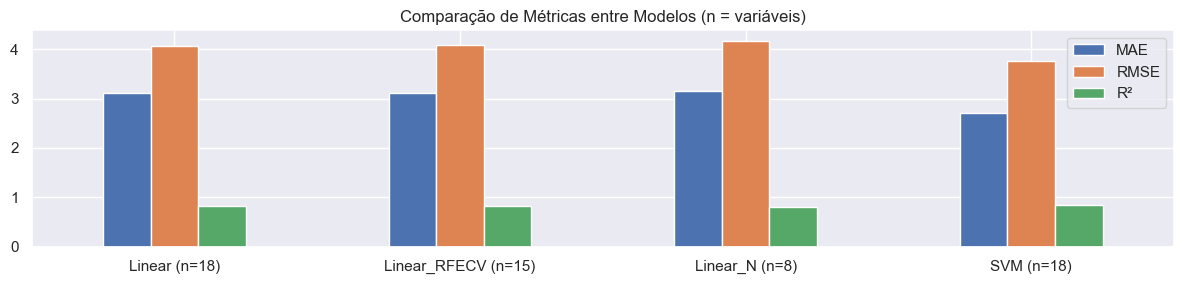

In [58]:
# cria dataframe com as métricas dos modelos
df_metricas = pd.DataFrame(metricas_modelos)
print(df_metricas.set_index('Modelo'))

# plota comparação
graf = df_metricas.set_index('Modelo')[['MAE', 'RMSE', 'R²']]
graf.index = [
    'Linear (n=18)', 
    'Linear_RFECV (n=15)', 
    'Linear_N (n=8)', 
    'SVM (n=18)'
]
graf.plot(kind='bar', figsize=(12, 3))
plt.title('Comparação de Métricas entre Modelos (n = variáveis)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# LifeExpectancy

Um aplicativo simples que embarca o pipeline, modelos e faz predições.

In [100]:
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class LifeExpectancy:
    def __init__(self, pipeline_path='pipeline.pkl', modelos_path='modelos.pkl', ind_N=indices):
        self.pipeline = joblib.load(pipeline_path)
        self.modelos = joblib.load(modelos_path)
        self.ind_N = ind_N # índices das features selecionadas para modelo Linear_N

    def preprocess(self, df):
        return self.pipeline.transform(df)

    def predict(self, df, model_name='Linear'):
        if model_name not in self.modelos:
            raise ValueError(f"Modelo '{model_name}' não encontrado.")
        
        modelo = self.modelos[model_name]
        X_processed = self.preprocess(df)
        
        if model_name == 'Linear_N': # usa apenas features selecionadas
            X_processed = X_processed[:, self.ind_N]
        return modelo.predict(X_processed)
    
    def calculate_metrics(self, y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        return mae, mse, rmse, r2

In [101]:
# carrega dados de 2015 para predição
_, _, X_2015, y_2015 = joblib.load("dados.pkl")
print(X_2015.shape)
print(X_2015.columns)

(183, 18)
Index(['Country', 'Status', 'Adult mortality', 'Infant deaths', 'Alcohol',
       'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness', 'Income', 'Schooling'],
      dtype='object')


                   MAE        MSE      RMSE        R²
Modelo                                               
Linear        2.711143  11.962141  3.458633  0.817745
Linear_RFECV  2.712384  11.885428  3.447525  0.818913
Linear_N      2.806265  12.953203  3.599056  0.802645
SVM           2.350119   9.041650  3.006934  0.862241


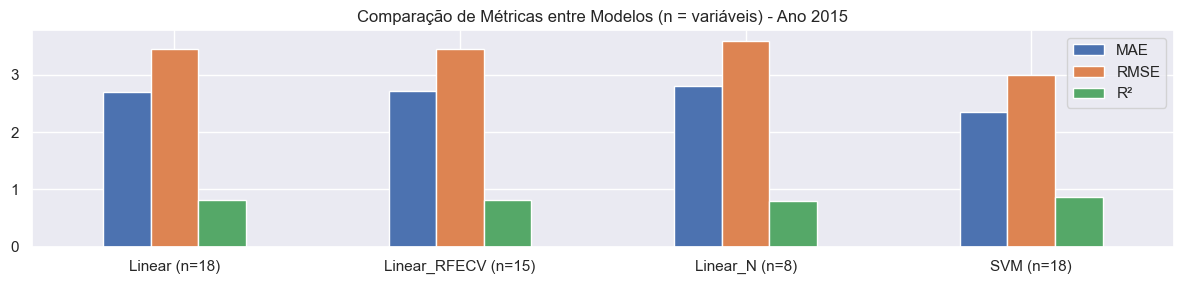

In [102]:
# faz predições para dataset 2015 e calcula métricas
le = LifeExpectancy()
metricas_2015 = []
salva_metricas(metricas=metricas_2015, inicializa=True)

for name in le.modelos.keys():
    y_pred = le.predict(X_2015, model_name=name)
    mae, mse, rmse, r2 = le.calculate_metrics(y_2015, y_pred)
    salva_metricas(name, mae, mse, rmse, r2, metricas_2015)

df_metricas_2015 = pd.DataFrame(metricas_2015)
print(df_metricas_2015.set_index('Modelo'))

graf_2015 = df_metricas_2015.set_index('Modelo')[['MAE', 'RMSE', 'R²']]
graf_2015.index = [
    'Linear (n=18)', 
    'Linear_RFECV (n=15)', 
    'Linear_N (n=8)', 
    'SVM (n=18)'
]
graf_2015.plot(kind='bar', figsize=(12, 3))
plt.title('Comparação de Métricas entre Modelos (n = variáveis) - Ano 2015')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [103]:
# cria datafame para as predições de todos os modelos para todos os países em 2015
df_predicoes_2015 = pd.concat([X_2015['Country'].reset_index(drop=True), y_2015.reset_index(drop=True)], axis=1)

# calcula predições para todos os países
predicoes_2015 = {}
for name in le.modelos.keys():
    predicoes_2015[name] = le.predict(X_2015, model_name=name)

# concatena as predições ao dataframe
df_predicoes_2015 = pd.concat([df_predicoes_2015, pd.DataFrame(predicoes_2015)], axis=1)
df_predicoes_2015.columns = ['Country', 'Real'] + list(le.modelos.keys())

# salva dataframe com predições
df_predicoes_2015.to_csv("predicoes_2015.csv", index=False)

In [104]:
print(df_predicoes_2015.head(10))
print()
print(df_predicoes_2015.query("Country == 'Brazil'"))

               Country  Real     Linear  Linear_RFECV   Linear_N        SVM
0          Afghanistan  65.0  60.033874     60.111557  63.084406  59.972667
1              Albania  77.8  75.737405     76.052241  76.562302  75.986509
2              Algeria  75.6  76.247509     76.548487  77.421979  76.193823
3               Angola  52.4  59.856187     60.042750  62.245262  59.219112
4  Antigua and Barbuda  76.4  75.841283     76.091432  76.882318  76.730656
5            Argentina  76.3  77.488534     77.823457  78.315904  76.656383
6              Armenia  74.8  73.064013     73.377492  73.678946  73.799753
7            Australia  82.8  83.993391     84.408872  82.741905  80.412531
8              Austria  81.5  79.670026     80.056616  78.255970  79.736801
9           Azerbaijan  72.7  73.128342     73.425104  73.760370  74.004038

   Country  Real     Linear  Linear_RFECV   Linear_N        SVM
22  Brazil  75.0  74.670674      74.93325  75.420711  74.613211
